## SavorStay - Customer Segmentation Analysis

#### **Goal**: How can SavorStay grow their business with their most loyal users? What would work best for this new segment?

#### **Getting Started**

In [3]:
# Import all necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [4]:
# Import dataset
file_path = 'LAUNCH Superday Case Study_SavorStay.xlsm'
Customers = pd.read_excel(file_path)

In [5]:
# Preview DF
print(Customers.head())

   Customer ID  Exact Spend  #MealKits Income Range Age Range  \
0        91844     358130.0         36        >150K       >65   
1        72134     296876.0         27        >150K     35-50   
2          787     292246.0         60        >150K     50-65   
3        55159     292229.0         22        >150K     35-50   
4        11428     286901.0         28        >150K       <35   

  Product Spend Range Loyalty Product Type  
0               100k+                 HIGH  
1               100k+               MEDIUM  
2               100k+                  LOW  
3               100k+               MEDIUM  
4               100k+               MEDIUM  


In [9]:
# Check each column data type
Customers.dtypes

Customer ID               int64
Exact Spend             float64
#MealKits                 int64
Income Range             object
Age Range                object
Product Spend Range      object
Loyalty Product Type     object
dtype: object

In [47]:
# Understand file size and data within the columns
Customers.describe()

### Reminder that the other columns are all categorical

,Customer ID,Exact Spend,#MealKits
count,98757.000000,98757.000000,98757.000000
mean,50004.228703,7928.379278,6.093158
std,28865.097960,16528.230196,14.866633
min,1.000000,0.000000,0.000000
25%,25013.000000,0.000000,0.000000
50%,49999.000000,1048.000000,1.000000
75%,74999.000000,7858.000000,6.000000
max,100000.000000,358130.000000,792.000000


In [43]:
# Check number of unique values
Customers.nunique()

Customer ID             98757
Exact Spend             25769
#MealKits                 234
Income Range                5
Age Range                   4
Product Spend Range         6
Loyalty Product Type        3
dtype: int64

In [45]:
# Check number of null values
Customers.isnull().sum()

### Note that there are no null values within the dataset

Customer ID             0
Exact Spend             0
#MealKits               0
Income Range            0
Age Range               0
Product Spend Range     0
Loyalty Product Type    0
dtype: int64

#### **Cleaning Data**

In [13]:
### Note that the other columns are all categorical - determine if we want to leave them that way

# To check if we want to leave other columns as categorical variables let's check our variable possibilities
# Check possibilities for Income Range, Age Range, Product Spend Range, Loyalty Product Type
print("Income Range possibilities:", Customers['Income Range'].unique())
print("Age Range possibilities:", Customers['Age Range'].unique())
print("Product Spend Range possibilities:", Customers['Product Spend Range'].unique())
print("Loyalty Product Type possibilities:", Customers['Loyalty Product Type'].unique())

Income Range possibilities: [' >150K' ' 110-150K' ' 75-110K' ' 50-75K' ' <50k']
Age Range possibilities: [' >65' ' 35-50' ' 50-65' '<35']
Product Spend Range possibilities: [' 100k+' ' 30-100K' ' 15-30k' ' 5-15k' ' 1-5k' '<1k']
Loyalty Product Type possibilities: ['HIGH' 'MEDIUM' 'LOW']


Based on our understanding of the data above, I have choosen to leave Income Range, Age Range, Product Spend Range, and Loyalty Product Type as categorical variables. These were predetermined categories within the dataset, which likely means they are categories used regularly inside the company. If I was to take this one step further I would like to make these categorical variables into continuous variables to see if there are noticeable trends outside of the predetermined groups.

#### **EDA**

Income Range           110-150K   50-75K   75-110K   <50k   >150K
Loyalty Product Type                                             
HIGH                       1040     1194      1350    717    2528
LOW                        8499    17057     14337  12679   18065
MEDIUM                     2955     4428      4412   2482    7014


Income Range           110-150K     50-75K    75-110K       <50k      >150K
Loyalty Product Type                                                       
HIGH                  15.229170  17.484258  19.768634  10.499341  37.018597
LOW                   12.031938  24.147402  20.296728  17.949517  25.574416
MEDIUM                13.879104  20.797520  20.722371  11.657508  32.943497


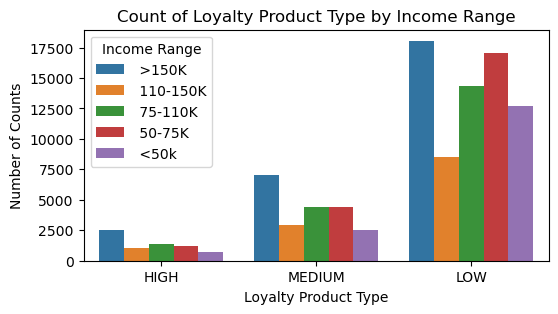

In [188]:
# Look at the relationship between Loyalty Product Type & Income range
approval_table = pd.crosstab(Customers['Loyalty Product Type'], Customers['Income Range'])
print(approval_table)

print("\n")

# Convert counts to percentages within each row
approval_percentage_row = approval_table.div(approval_table.sum(axis=1), axis=0) * 100
print(approval_percentage_row)

# Plot a grouped bar chart
plt.figure(figsize=(6, 3))
sns.countplot(x='Loyalty Product Type', hue='Income Range', data = Customers)
plt.title("Count of Loyalty Product Type by Income Range")
plt.xlabel("Loyalty Product Type")
plt.ylabel("Number of Counts")
plt.legend(title = "Income Range")
plt.show()

# Notes: For each count of loyalty product type (low, medium, and high), income range of >150k had the highest count and income range between 110-150k had the lowest count. Obviously these counts were different with the High loyalty product type having a highest count of 2528, medium of 7014, and low of 18065.

Age Range              35-50   50-65    >65   <35
Loyalty Product Type                             
HIGH                    2093    2124   1034  1578
LOW                    16863   27007  18396  8371
MEDIUM                  6098    8039   4152  3002


Age Range                 35-50      50-65        >65        <35
Loyalty Product Type                                            
HIGH                  30.648704  31.102650  15.141309  23.107336
LOW                   23.872758  38.233504  26.043009  11.850730
MEDIUM                28.641210  37.757738  19.501198  14.099854


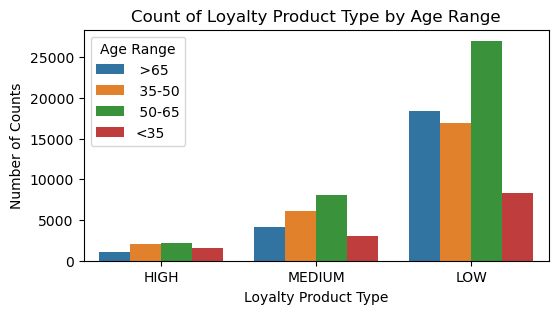

In [190]:
# Age Range
approval_table2 = pd.crosstab(Customers['Loyalty Product Type'], Customers['Age Range'])
print(approval_table2)

print("\n")

# Convert counts to percentages within each row
approval_percentage_row2 = approval_table2.div(approval_table2.sum(axis=1), axis=0) * 100
print(approval_percentage_row2)

# Plot a grouped bar chart
plt.figure(figsize=(6, 3))
sns.countplot(x='Loyalty Product Type', hue='Age Range', data = Customers)
plt.title("Count of Loyalty Product Type by Age Range")
plt.xlabel("Loyalty Product Type")
plt.ylabel("Number of Counts")
plt.legend(title = "Age Range")
plt.show()

# Notes: In Count of Loyalty Product Type by Age Range, ages 50-65 were the highest counts for each group and ages >65 was the lowest for high loyalty product type and ages <35 were the lowest for medium and low loyalty product type

Age Range              35-50   50-65    >65   <35
Loyalty Product Type                             
HIGH                    2093    2124   1034  1578
LOW                    16863   27007  18396  8371
MEDIUM                  6098    8039   4152  3002


Product Spend Range        1-5k     100k+     15-30k    30-100K      5-15k  \
Loyalty Product Type                                                         
HIGH                  22.111583  1.449700  13.457314  13.310880  21.906575   
LOW                   19.001373  0.168467   6.687713   4.608067  12.896924   
MEDIUM                20.022545  1.047391  13.446996  14.668170  18.059274   

Product Spend Range         <1k  
Loyalty Product Type             
HIGH                  27.763948  
LOW                   56.637456  
MEDIUM                32.755624  


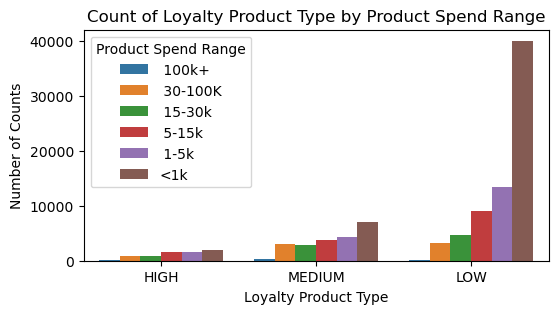

In [192]:
# Product Spend
approval_table3 = pd.crosstab(Customers['Loyalty Product Type'], Customers['Product Spend Range'])
print(approval_table2)

print("\n")

# Convert counts to percentages within each row
approval_percentage_row3 = approval_table3.div(approval_table3.sum(axis=1), axis=0) * 100
print(approval_percentage_row3)

# Plot a grouped bar chart
plt.figure(figsize=(6, 3))
sns.countplot(x='Loyalty Product Type', hue='Product Spend Range', data = Customers)
plt.title("Count of Loyalty Product Type by Product Spend Range")
plt.xlabel("Loyalty Product Type")
plt.ylabel("Number of Counts")
plt.legend(title = "Product Spend Range")
plt.show()

# Notes: For Loyalty Product Type by Product Spend Range, the count of each group decreases as product spend range increases 

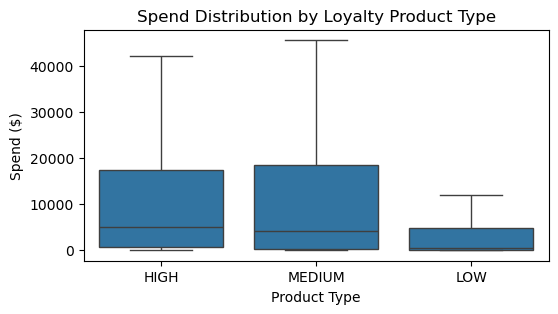

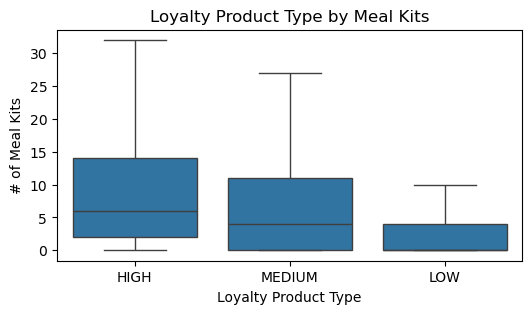

In [214]:
# Make a boxplot for Loyalty Product Type and Exact Spend & Meal Kits  
plt.figure(figsize=(6, 3))
sns.boxplot(x='Loyalty Product Type', y='Exact Spend', data = Customers, showfliers=False)
plt.title("Spend Distribution by Loyalty Product Type")
plt.xlabel("Product Type")
plt.ylabel("Spend ($)")
plt.show()

print('\n')

# Boxplot for Meal Kits
plt.figure(figsize=(6, 3))
sns.boxplot(x='Loyalty Product Type', y='#MealKits', data = Customers, showfliers=False)
plt.title("Loyalty Product Type by Meal Kits")
plt.xlabel("Loyalty Product Type")
plt.ylabel("# of Meal Kits")
plt.show()

In [93]:
# Group by Loyalty Product Type and calculate statistics for Exact Spend & Meal Kits
summary_stats_spend = Customers.groupby('Loyalty Product Type')['Exact Spend'].agg(
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Max='max'
)

summary_stats_meals = Customers.groupby('Loyalty Product Type')['#MealKits'].agg(
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Max='max'
)


print(summary_stats_spend)
print('\n')
print(summary_stats_meals)

## Notice over 50% of low loyalty product type customers are not buying a meal kit

                      Min     Q1  Median       Q3       Max
Loyalty Product Type                                       
HIGH                  0.0  741.0  5016.0  17295.0  358130.0
LOW                   0.0    0.0   432.0   4744.0  292246.0
MEDIUM                0.0  222.5  4195.0  18359.5  296876.0


                      Min   Q1  Median    Q3  Max
Loyalty Product Type                             
HIGH                    0  2.0     6.0  14.0  313
LOW                     0  0.0     0.0   4.0  792
MEDIUM                  0  0.0     4.0  11.0  713


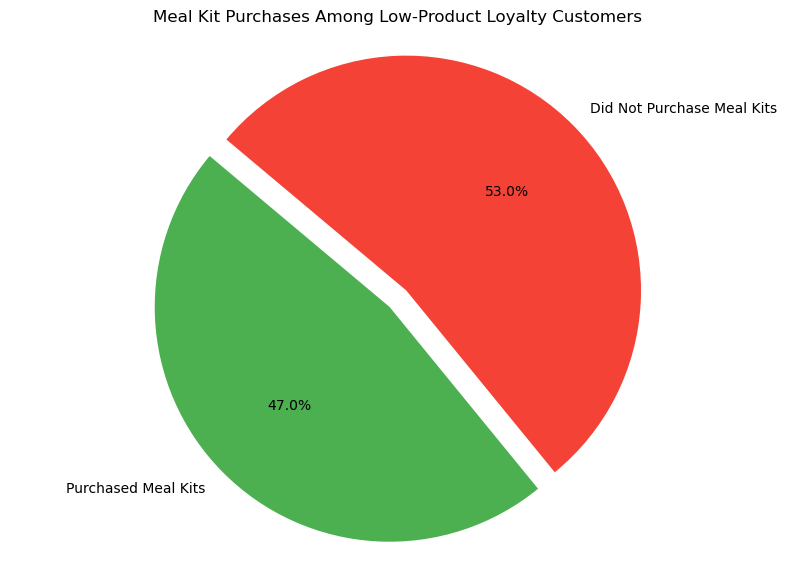

In [210]:
# Filter by low loyalty product type customers
customers_lowloyalty = Customers[Customers['Loyalty Product Type'] == 'LOW']
customers_lowloyalty

# Replace these with your actual counts
purchased_meal_kits = customers_lowloyalty[customers_lowloyalty['#MealKits'] > 0].shape[0]  # Count of customers who purchased meal kits
not_purchased_meal_kits = customers_lowloyalty[customers_lowloyalty['#MealKits'] == 0].shape[0]  # Count of customers who did not purchase meal kits

# Data for the pie chart
labels = ['Purchased Meal Kits', 'Did Not Purchase Meal Kits']
sizes = [purchased_meal_kits, not_purchased_meal_kits]
colors = ['#4CAF50', '#F44336']  # Green for purchased, Red for not purchased
explode = (0.1, 0)  # explode the first slice for emphasis

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Meal Kit Purchases Among Low-Product Loyalty Customers")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

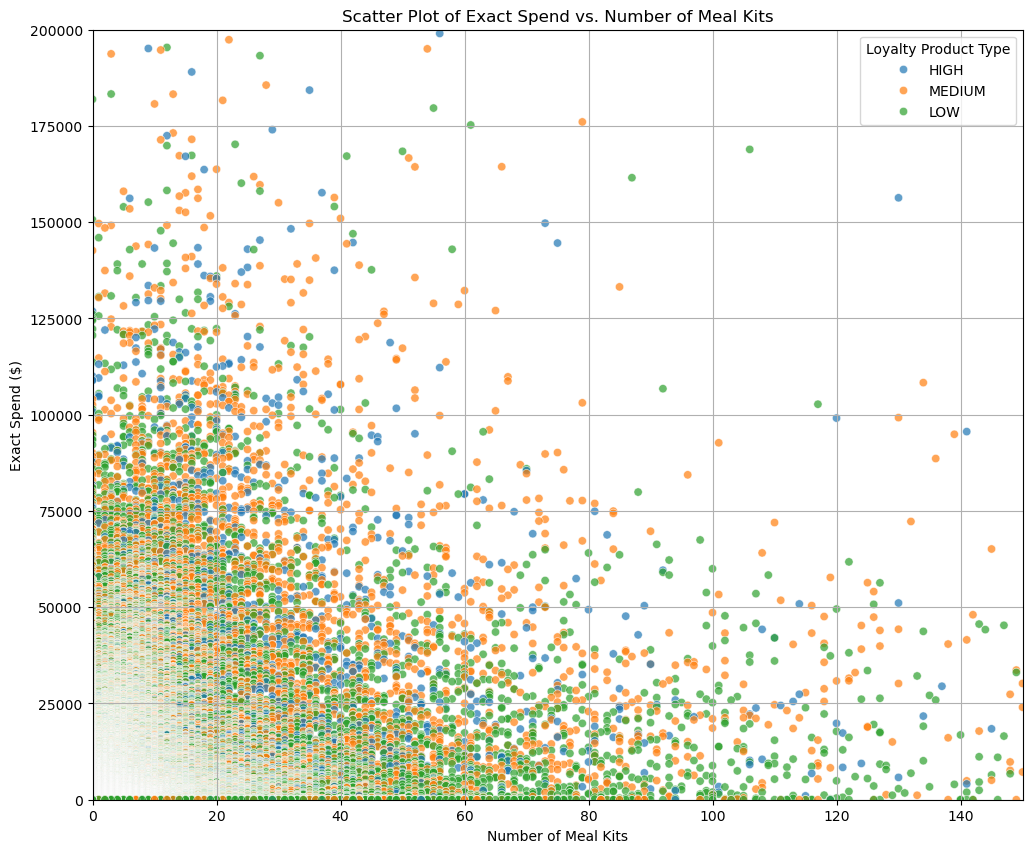

In [66]:
# Make a scatter plot for Exact Spend and #MealKits
# Color it by Loyalty Product Type
plt.figure(figsize=(12, 10))
sns.scatterplot(x='#MealKits', y='Exact Spend', data = Customers, hue = 'Loyalty Product Type', alpha=0.7)

# Zoomed in on the graph to see if there was any pattern in the cluster found in the bottom left
plt.xlim(0, 150)
plt.ylim(0, 200000)

# Label the graph
plt.title("Scatter Plot of Exact Spend vs. Number of Meal Kits")
plt.xlabel("Number of Meal Kits")
plt.ylabel("Exact Spend ($)")
plt.grid(True)
plt.show()

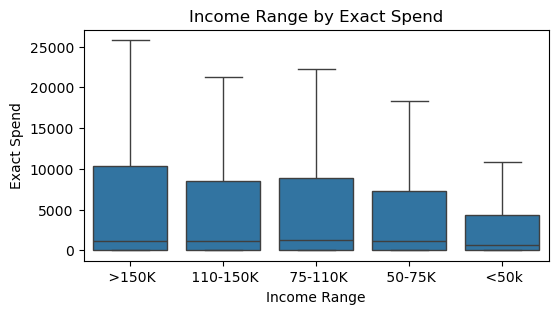

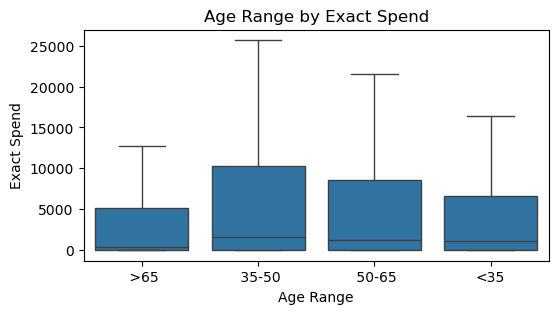

In [216]:
# Put Exact Spend against Income Range & Age Range
plt.figure(figsize=(6, 3))
sns.boxplot(x='Income Range', y='Exact Spend', data = Customers, showfliers=False)
plt.title("Income Range by Exact Spend")
plt.xlabel("Income Range")
plt.ylabel("Exact Spend")
plt.show()

print('\n')

plt.figure(figsize=(6, 3))
sns.boxplot(x='Age Range', y='Exact Spend', data = Customers, showfliers=False)
plt.title("Age Range by Exact Spend")
plt.xlabel("Age Range")
plt.ylabel("Exact Spend")
plt.show()

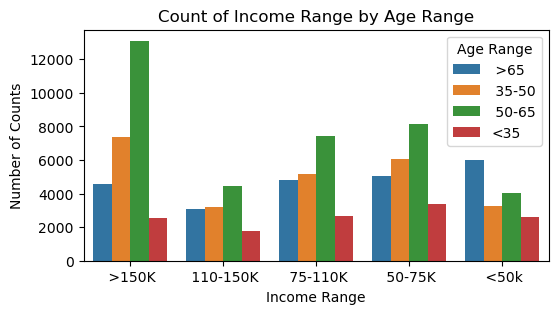

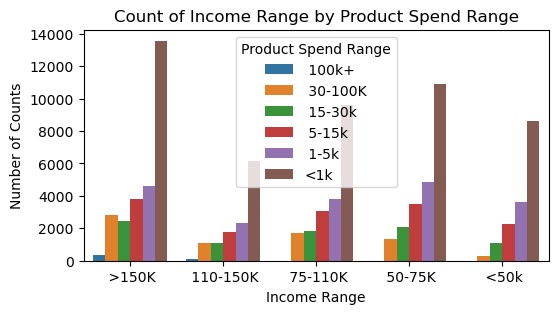

In [218]:
# Check Income Range against Age Range and Product Spend Range to see if it has the trend we would expect
plt.figure(figsize=(6, 3))
sns.countplot(x='Income Range', hue='Age Range', data = Customers)
plt.title("Count of Income Range by Age Range")
plt.xlabel("Income Range")
plt.ylabel("Number of Counts")
plt.legend(title = "Age Range")
plt.show()

print('\n')

plt.figure(figsize=(6, 3))
sns.countplot(x='Income Range', hue='Product Spend Range', data = Customers)
plt.title("Count of Income Range by Product Spend Range")
plt.xlabel("Income Range")
plt.ylabel("Number of Counts")
plt.legend(title = "Product Spend Range")
plt.show()

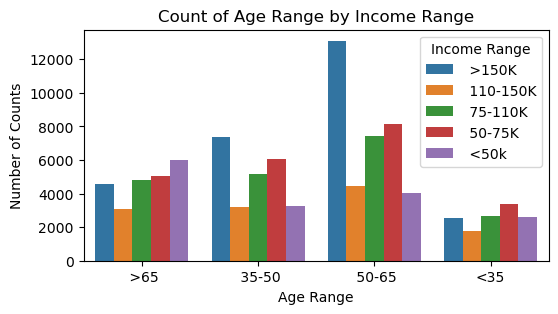

In [220]:
# Make a grouped bar chart for age range by income range
plt.figure(figsize=(6, 3))
sns.countplot(x='Age Range', hue='Income Range', data = Customers)
plt.title("Count of Age Range by Income Range")
plt.xlabel("Age Range")
plt.ylabel("Number of Counts")
plt.legend(title = "Income Range")
plt.show()

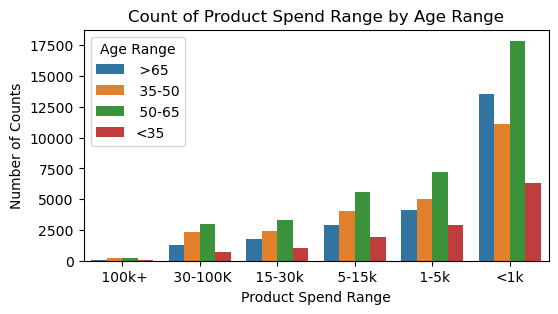

In [224]:
# Make another stacked bar for product spend range by age range
plt.figure(figsize=(6, 3))
sns.countplot(x='Product Spend Range', hue='Age Range', data = Customers)
plt.title("Count of Product Spend Range by Age Range")
plt.xlabel("Product Spend Range")
plt.ylabel("Number of Counts")
plt.legend(title = "Age Range")
plt.show()

##### **What does data tell us about these loyalty product owners?**

**Income Range**: Higher income levels (>150K) had the highest count of loyalty product users, especially in the high loyalty segment. <br>
**Age Distribution**: The 50-65 age group dominates each loyalty segment, indicating strong engagement among older users.<br>
**Product Spend Trends**: Lower spend ranges had higher user counts across all loyalty types, suggesting room to incentivize higher spending among loyal customers.<br>
**Takeaway**: SavorStay’s most loyal customers are primarily high-income, users aged 50-65, with spending levels concentrated at lower spend ranges.

**Exact Spend by Loyalty Type**: High loyalty users spend significantly more on average, with a median of \$5,016 compared to \$432 for low and \$4,195 for medium loyalty. <br>
**Meal Kit Purchase Frequency by Loyalty Type**: High loyalty users have a median of 6 meal kits, compared to 4 for medium and 0 for low. <br>
**Takeaway**: High loyalty users not only spend more but also purchase meal kits more frequently, making them ideal targets for a premium subscription model.

#### **Figuring out Growth**

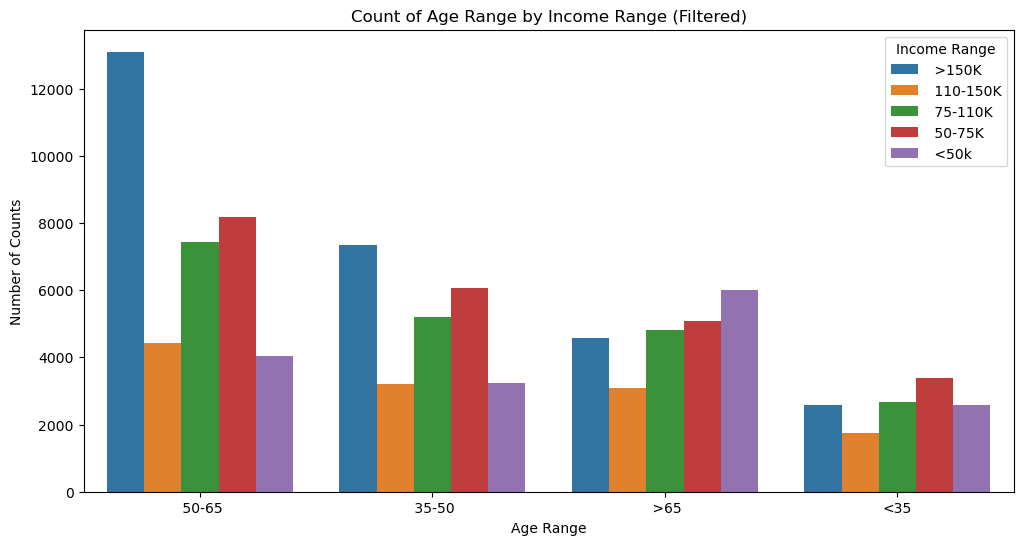

In [198]:
# We want to figure out is there room for potential growth

# Filter rows where 'Exact Spend' is less than 200000
filtered_customers = Customers[Customers['Exact Spend'] < 200000]

plt.figure(figsize=(12, 6))
sns.countplot(x='Age Range', hue='Income Range', data = filtered_customers)
plt.title("Count of Age Range by Income Range (Filtered)")
plt.xlabel("Age Range")
plt.ylabel("Number of Counts")
plt.legend(title = "Income Range")
plt.show()


# This is good because we have the same demographic of people as our high spenders meaning that there is a group of potential high spenders that have not been unlocked yet

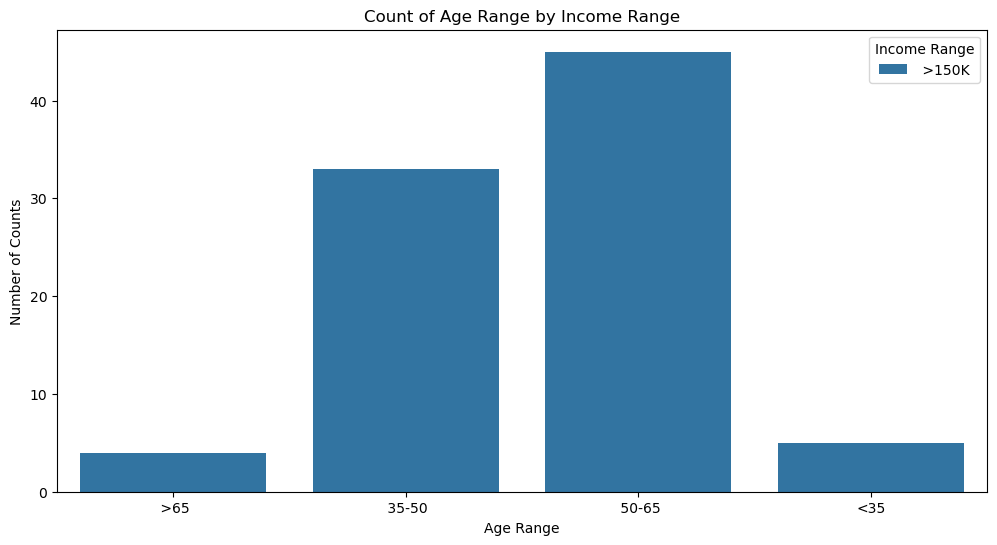

Number of rows with Age Range 35-50 or 50-65: 78


In [186]:
# Find a statistic of the group that was taken out and see how many of those were in age ranges 35-65 and where high income ranges

# Filter out the rows where 'Exact Spend' is 200,000 or more
filtered_out_customers = Customers[Customers['Exact Spend'] >= 150000]
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Range', hue='Income Range', data = filtered_out_customers)
plt.title("Count of Age Range by Income Range")
plt.xlabel("Age Range")
plt.ylabel("Number of Counts")
plt.legend(title = "Income Range")
plt.show()

# Filter for rows where Age Range is either '35-50' or '50-65'
specifiedAge = filtered_out_customers[filtered_out_customers['Age Range'].isin([' 35-50', ' 50-65'])]
# Get the count of rows in the filtered DataFrame
num_rows = len(specifiedAge)
print("Number of rows with Age Range 35-50 or 50-65:", num_rows)

In [180]:
# Then find the amount of that for our total population 
specifiedAgeIncome = Customers[
    (Customers['Age Range'].isin([' 35-50', ' 50-65'])) &
    (Customers['Income Range'] == ' >150K')
]

# Get the count of rows in the filtered DataFrame
num_rows = len(specifiedAgeIncome)
print("Number of rows with Age Range 35-50 or 50-65 and Income Range >150K:", num_rows)

Number of rows with Age Range 35-50 or 50-65 and Income Range >150K: 20470


In [182]:
# Now we want our most loyal high spenders/total possible high spenders
(78/20470)*100

0.38104543234000976

/var/folders/cp/bjvk0xwx5hx80rsxzhllwy2c0000gn/T/ipykernel_1274/955351214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_150k['Spend Category'] = customers_150k['Exact Spend'].apply(


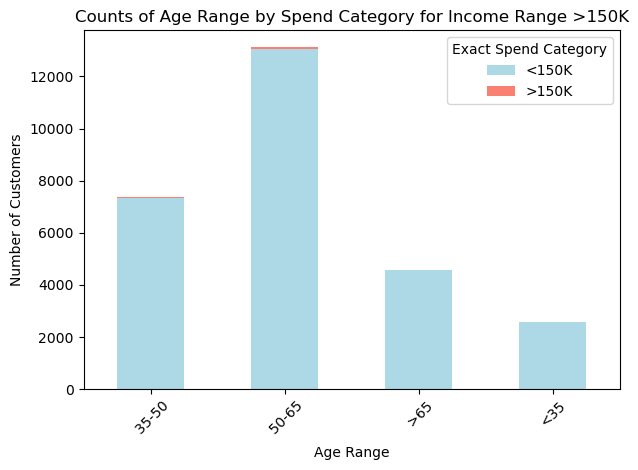

In [196]:
# Let's create a visualization for the presentation that showcases, how much room there is to grow within this specified population

# Filter the DataFrame for Income Range '>150K'
customers_150k = Customers[Customers['Income Range'] == ' >150K']

# Create a new column to classify Exact Spend
customers_150k['Spend Category'] = customers_150k['Exact Spend'].apply(
    lambda x: '>150K' if x > 150000 else '<150K'
)

# Group by Age Range and Spend Category and count occurrences
age_spend_counts = customers_150k.groupby(['Age Range', 'Spend Category']).size().unstack(fill_value=0)

# Plotting the stacked bar graph
age_spend_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Counts of Age Range by Spend Category for Income Range >150K')
plt.xlabel('Age Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Exact Spend Category')
plt.tight_layout()
plt.show()